In [323]:
import numpy as np
import random as r
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend

In [319]:
# const

THRESHOLD_BASE = 1
BITS = 2



class Neuron:
    def __init__(self, uid):
        self.uid = uid
        
        self.threshold = THRESHOLD_BASE

        self.potential = 0
        
        self.inbox=0
        self.targets = []
        
        self.mediator =  r.getrandbits(BITS)
  
        
        self.fired = 0
        self.clock = 0
        self.log_inbox=0
        
    def log(self, msg):
        if self.uid == 0:
            print(msg)

    def enqueue(self, signal):
        if signal == 0b10:
            self.inbox += 1
        if signal == 0b11:
            pass
        if signal == 0b01:
            self.inbox +=1
      
        if signal == 0b00:
   
            self.inbox += 1
        
    

    def process(self, epoch):
        self.fired = 0
        
        if self.inbox>=3:
            self.inbox=3
        elif self.inbox<=-1:
            self.inbox=-1
            
        self.potential+=self.inbox
        self.log_inbox=self.inbox
        self.inbox=0
        
        # processing
        if self.potential > 0:
            self.potential -= 1 # decay
        elif self.potential < -2:
            self.potential = -1
        elif self.potential < 0:
            self.potential += 1
            
        self.clock += 1
        
            
        if (self.clock % 3) == 0:
            self.threshold = max(THRESHOLD_BASE, self.threshold-1)
           
        if self.potential >= self.threshold:
            #self.log("fire {len(self.targets)}")
            for t in self.targets:
                t.enqueue(self.mediator)
                
            self.clock = 0    
            self.potential= -1
            self.threshold += 1

            self.fired = 1


class Cleft:
    def __init__(self, neuron, delay):
        self.neuron = neuron
        self.delay = delay
        
        
        self.inbox = [None] * delay
        self.pointer = 0
        
    def enqueue(self, signal):
   
        self.inbox[self.pointer] = signal
        
    def process(self, epoch):
        self.pointer = (self.pointer + 1) % len(self.inbox)
        
        signal = self.inbox[self.pointer]
        
        if signal is not None:
            self.neuron.enqueue(signal)
        self.inbox[self.pointer] = None

In [320]:
def plot(I, O, **kwargs):
    count = 2 + len(kwargs)
    fig, axes = plt.subplots(count, 1, sharex=True,figsize=(12,3))
    ax1=axes[0]
    ax2=axes[1]

    ax1.step(time, I, 'b-') # y label
    ax2.step(time, O, 'r-')
   

    axes[-1].set_xlabel('time') # x label

    ax1.set_ylabel('Input', color='b')
    ax2.set_ylabel('Output', color='r')
    
    c = 2
    for k, v in kwargs.items():
        ax = axes[c]
        c+=1
        ax.step(time,v)
        ax.set_ylabel(k)
        
    plt.show()   

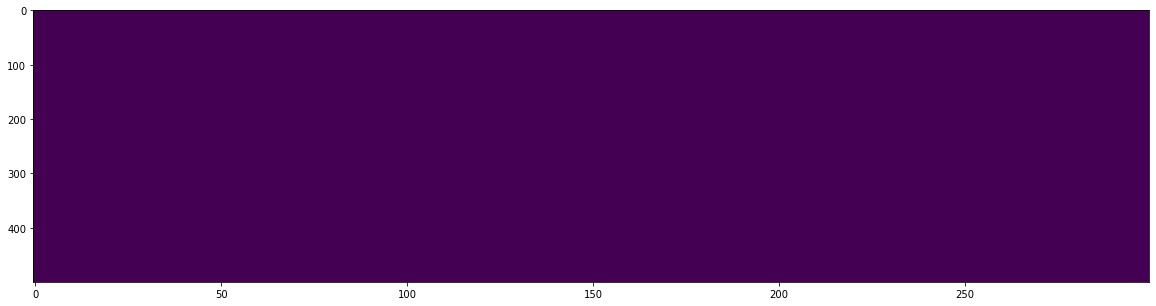

In [321]:
TIME=300
NEURONS=500
CONNECTIONS=30

time=np.arange(0, TIME,1)

I=np.zeros(TIME)
O=np.zeros(TIME)
d1=np.zeros(TIME)
d2=np.zeros(TIME)

neurons = [Neuron(i) for i in range(NEURONS)]
# connect neurons randomly

fires = np.zeros((TIME, NEURONS))

clefts = []
for n in neurons:
    targets = r.sample(neurons, 20)
    for t in targets:
        c = Cleft(t, r.randint(2,9))
        n.targets.append(c) 
        clefts.append(c)

fired = 0

for c in clefts[0:10]:
    c.enqueue(r.getrandbits(BITS))
for i in time:
    
    neuron_inbox = 0
    cleft_inbox = 0
    for n in neurons:
        n.enqueue(3)
        fires[i][n.uid]=n.fired
        
        n.process(i)
        if n.fired:
            O[i]+=1
    for c in clefts:

        c.process(i)
        
plt.figure(figsize = (20,5))
_ = plt.imshow(fires.T, interpolation='none', aspect='auto')
plt.show()

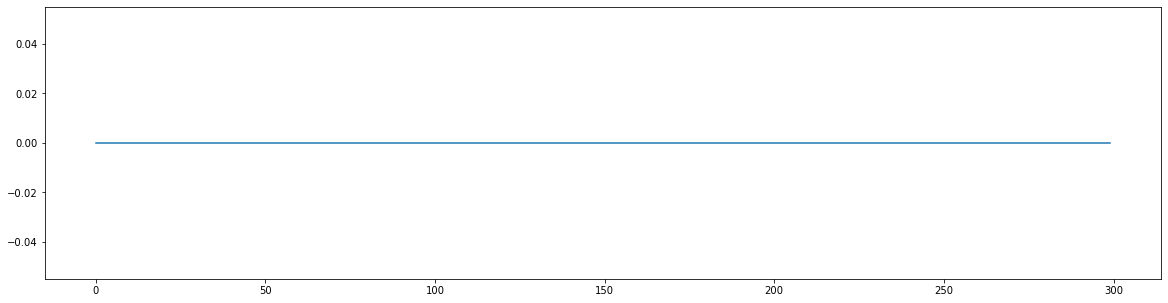

In [322]:
plt.figure(figsize = (20,5))
_ = plt.plot(O)